In [88]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")
df = pd.read_csv('./stock_data/A.csv', index_col='Date')


In [91]:
# 生成範例數據
np.random.seed(0)
n_train = int(0.8 * len(df))  # 訓練數據的數量
n_test = len(df) - n_train   # 測試數據的數量
n_total = n_train + n_test

In [94]:
y = df['Adj Close']
X = df.drop('Adj Close', axis=1)
data = pd.concat([X, y], axis=1)

In [95]:

# 將數據劃分為訓練和測試集
train_data = data.iloc[:n_train]
test_data = data.iloc[n_train:]

In [96]:
# 使用auto_arima尋找最佳SARIMAX模型
model = auto_arima(train_data['Adj Close'],
                   exogenous=train_data.iloc[:, 1:6],
                   seasonal=True,
                   m=30,  # 根據實際數據情況調整
                   stepwise=True,
                   suppress_warnings=True,
                   trace=True)

# 打印最佳模型摘要
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=inf, Time=24.14 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=8457.716, Time=0.22 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=8412.562, Time=1.57 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=8417.420, Time=8.51 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=8458.277, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=8412.258, Time=0.18 sec
 ARIMA(1,1,0)(0,0,1)[30] intercept   : AIC=8412.591, Time=1.50 sec
 ARIMA(1,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=8.66 sec
 ARIMA(2,1,0)(0,0,0)[30] intercept   : AIC=8403.292, Time=0.27 sec
 ARIMA(2,1,0)(1,0,0)[30] intercept   : AIC=8403.719, Time=2.09 sec
 ARIMA(2,1,0)(0,0,1)[30] intercept   : AIC=8403.742, Time=2.15 sec
 ARIMA(2,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=11.46 sec
 ARIMA(3,1,0)(0,0,0)[30] intercept   : AIC=8405.205, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[30] intercept   : AIC=8405.267, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[30] interce

In [102]:
# 對測試集進行預測
n_periods = n_test
forecast, conf_int = model.predict(n_periods=n_periods,
                                   exogenous=test_data.iloc[:, 1:6],
                                   return_conf_int=True)

In [115]:
type(test_data.Open)

pandas.core.series.Series

In [122]:
# 創建包含實際值和預測值的DataFrame
predicted_index = test_data.index
forecast_series = pd.Series(forecast, index=predicted_index)
conf_int_df = pd.DataFrame(conf_int, index=predicted_index, columns=['lower_ci', 'upper_ci'])

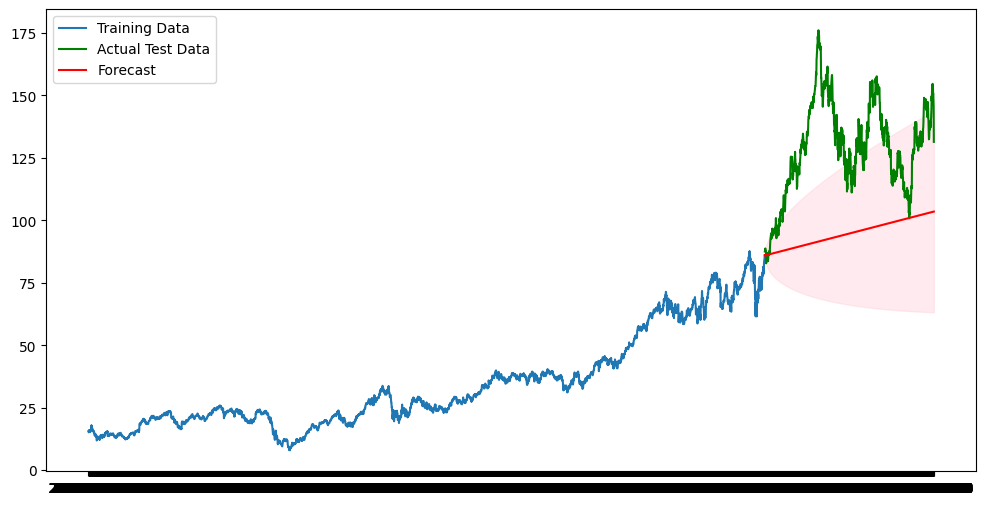

In [123]:
# 打印預測結果
# print("Forecasted values:")
# print(forecast_series)

# print("\nConfidence Intervals:")
# print(conf_int_df)

# 可視化結果
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Adj Close'], label='Training Data')
plt.plot(test_data.index, test_data['Adj Close'], label='Actual Test Data', color='green')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.fill_between(conf_int_df.index, conf_int_df['lower_ci'], conf_int_df['upper_ci'], color='pink', alpha=0.3)
plt.legend()
plt.show()